In [1]:
import sympy as sy
import numpy as np

import matplotlib.pyplot as plt

from DynamicalSystem import DynamicalSystem

# Start with the basics

## creating a new DynamicalSystem

In [2]:
system = DynamicalSystem('van_der_Pol')

## display the systems equations

In [3]:
system.show()

<IPython.core.display.Math object>

## get the variables

In [4]:
x,y = system.VARIABLES
x

x

## get the parameters

In [5]:
eps, = system.PARAMETERS
eps

epsilon

## adding a term

In [6]:
system.add_term([x], sy.symbols('I'))
system.show()

<IPython.core.display.Math object>

## obtain the fixed points

In [7]:
fixed_points = system.get_fixed_points(Jacobian=True)
for i,fp in enumerate(fixed_points):
    print(f'fixed point nr. {i}')
    print('x=')
    display(fp[x])
    print('y=')
    display(fp[y])
    print('Jacobian=')
    display(fp['Jacobian'])
    print('eigenvalues')
    for eigenval in fp['Jacobian'].eigenvals():
        display(eigenval.simplify())

fixed point nr. 0
x=


-sqrt(4*I**2*epsilon**2 + 1)/(2*I*epsilon) + 1/(2*I*epsilon)

y=


-I

Jacobian=


Matrix([
[                                                                             0,                                                                               1],
[2*I*epsilon*(-sqrt(4*I**2*epsilon**2 + 1)/(2*I*epsilon) + 1/(2*I*epsilon)) - 1, epsilon*(1 - (-sqrt(4*I**2*epsilon**2 + 1)/(2*I*epsilon) + 1/(2*I*epsilon))**2)]])

eigenvalues


(sqrt(4*I**2*epsilon**2 + 1) - sqrt(-16*I**4*epsilon**2*sqrt(4*I**2*epsilon**2 + 1) + (sqrt(4*I**2*epsilon**2 + 1) - 1)**2) - 1)/(4*I**2*epsilon)

(sqrt(4*I**2*epsilon**2 + 1) + sqrt(-16*I**4*epsilon**2*sqrt(4*I**2*epsilon**2 + 1) + (sqrt(4*I**2*epsilon**2 + 1) - 1)**2) - 1)/(4*I**2*epsilon)

fixed point nr. 1
x=


sqrt(4*I**2*epsilon**2 + 1)/(2*I*epsilon) + 1/(2*I*epsilon)

y=


-I

Jacobian=


Matrix([
[                                                                            0,                                                                              1],
[2*I*epsilon*(sqrt(4*I**2*epsilon**2 + 1)/(2*I*epsilon) + 1/(2*I*epsilon)) - 1, epsilon*(1 - (sqrt(4*I**2*epsilon**2 + 1)/(2*I*epsilon) + 1/(2*I*epsilon))**2)]])

eigenvalues


(-sqrt(4*I**2*epsilon**2 + 1) - sqrt(16*I**4*epsilon**2*sqrt(4*I**2*epsilon**2 + 1) + (sqrt(4*I**2*epsilon**2 + 1) + 1)**2) - 1)/(4*I**2*epsilon)

(-sqrt(4*I**2*epsilon**2 + 1) + sqrt(16*I**4*epsilon**2*sqrt(4*I**2*epsilon**2 + 1) + (sqrt(4*I**2*epsilon**2 + 1) + 1)**2) - 1)/(4*I**2*epsilon)

# Numerical features

## integrating the system in time

In [ ]:
params = {eps: 4.2, sy.symbols('I'): 0}

state0 = [0.3, 2.1]

t_max = 10.33
states_time = system.get_trajectories(t_span=(0., t_max), t_eval = np.linspace(0, t_max, 1000), 
                                      state0 = state0, parameter_values=params)

plt.plot(states_time.y[0,:], states_time.y[1,:])
plt.show()

## integrate until a condition is met

In [ ]:
# defining an event (the condition)
def x_crossing(t, state, epsilon):
    return state[0] - 1.3
x_crossing.direction = 1
x_crossing.terminal = True

states_thr  = system.get_trajectories(t_span=(0., t_max), t_eval = np.linspace(0, t_max, 1000), 
                                      state0 = state0, parameter_values=params, 
                                      events = x_crossing)

plt.plot(states_time.y[0,:], states_time.y[1,:])
plt.plot(states_thr.y[0,:],  states_thr.y[1,:], 'k:')
plt.show()

## integrate event-based

In [ ]:
# define state action

event_list = [(0.1, {sy.symbols('I'): 10.0}, None)]

#event_list = [(0., {}, lambda state: (state[0]+ 0.1*10, state[1] ))]

# integrate 
states, Time, event_idx = system.get_event_based_evolution(state0, params,
                                                           x_crossing, event_list, 
                                                           T_max=50, N_events=10)

plt.plot(states[0,:], states[1,:])

plt.axvline(1.3, c='k')

plt.show()

## get the isostable map close to a fixed point

In [10]:
system = DynamicalSystem('van_der_Pol')

### ... for a focus

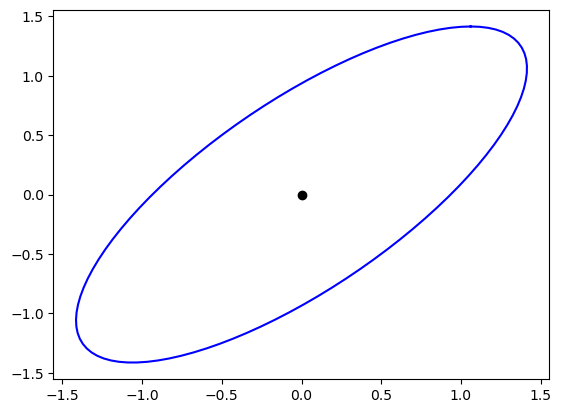

In [9]:
params = {sy.symbols('epsilon'): 1.5}

isomaps = system.get_isostable_map_at_fixed_points(params)
isomap = isomaps[0]

psi = np.linspace(0, 2.*np.pi, 100)

fixed_point = isomap(0,0)
isostable_curve = np.array([isomap(1, p) for p in psi]).T

plt.plot(fixed_point[0], fixed_point[1], marker='o', c='k')
plt.plot(isostable_curve[0], isostable_curve[1], c='b')
plt.show()

### ... for a node

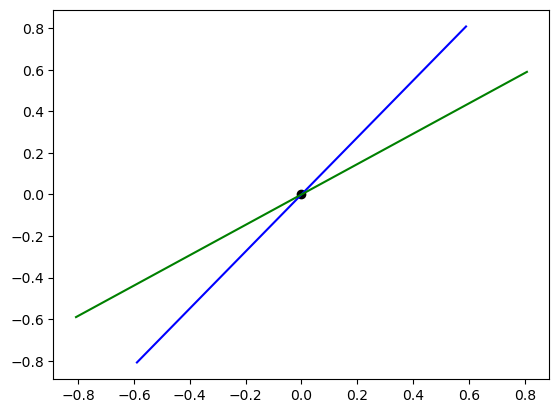

In [19]:
params = {sy.symbols('epsilon'): 2.1}

isomaps = system.get_isostable_map_at_fixed_points(params)
isomap = isomaps[0]

x = np.linspace(-1, 1, 100)

fixed_point = isomap(0,0)
plt.plot(fixed_point[0], fixed_point[1], marker='o', c='k')

isostable_curve = np.array([isomap(0, a2) for a2 in x]).T
plt.plot(isostable_curve[0], isostable_curve[1], c='b')

isostable_curve = np.array([isomap(a1, 0) for a1 in x]).T
plt.plot(isostable_curve[0], isostable_curve[1], c='g')

plt.show()

# Setting up more complex models

## obtain the time-inverted system

In [ ]:
#system_inv = system.get_

## Rayleigh system

In [ ]:
system = DynamicalSystem('rayleigh')
params = {sy.symbols('mu'): 2.,
          sy.symbols('omega'): 0.98}

state0 = [0.3, 2.1]

t_max = 1000.
states = system.get_trajectories((0., t_max), 
                                  t_eval = np.linspace(0.8*t_max, t_max, 1000), 
                                  state0 = state0, parameter_values=params)

plt.plot(states.y[0,:], states.y[1,:])
plt.show()

## a linear system

In [ ]:
system = DynamicalSystem('linear', variables=[sy.symbols('x'), sy.symbols('y'), sy.symbols('z')])
system.show()

## a coupled system

## performing a transformation

Here, we perform a transformation from the Rayleigh system to the van der Pol system:

In [2]:
system_ray = DynamicalSystem('rayleigh')

x,y = system_ray.VARIABLES
w,mu = system_ray.PARAMETERS

system_ray.show()

<IPython.core.display.Math object>

In [14]:
u,v = sy.symbols('u, v')

system_transformed = system_ray.new_transformed([u,v], {x: 1/w**2/sy.sqrt(3)*(mu*u*(1-u**2/3)-v), y: u/sy.sqrt(3)})
system_transformed.show()

<IPython.core.display.Math object>

## the polar transformation

In [18]:
R,theta = sy.symbols('R, theta')

system_transformed = system_ray.new_transformed([R,theta], {x: R*sy.cos(theta), y: R*sy.sin(theta)})
system_transformed.ODE[1].trigsimp()

-R**2*mu*sin(theta)**3*cos(theta) + mu*sin(2*theta)/2 - omega**2*cos(theta)**2 - sin(theta)**2